In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def clean_power_series(aggregate_power, activations):
    #aggregate_power.index = pd.to_datetime(aggregate_power.index,unit='s')
    #activations['start'] = pd.to_datetime(activations['start'],unit='s')
    #activations['end'] = pd.to_datetime(activations['end'],unit='s')
    
    temp_ap = aggregate_power.copy()
    
    n = activations.shape[0]

    pcent = int(n/100)
    ap_sans_activations = pd.DataFrame()
    
    ap_sans_activations.append(temp_ap[:activations['start'][0]])
    
    for i in range(1,n):
        if i % pcent == 0:
            print(str(i/pcent) + '%')
        ap_sans_activations = ap_sans_activations.append(temp_ap[activations['end'][i-1]:activations['start'][i]])
    
    ap_sans_activations.append(temp_ap[activations['end'][i]:])
    
    return ap_sans_activations

def get_appliance_signatures(aggregate_power, activations):
    
    signatures = []
    for i in range(activations.shape[0]):
        start = activations['start'][i]
        end = activations['end'][i]
        signatures.append(aggregate_power[start:end])
        
    return signatures
        
def make_syntethic_data(aggregate_power, activations, n = 10000, ap_sans_activations = None, sample_length = 128):
    if ap_sans_activations is None:
        ap_sans_activations = clean_power_series(aggregate_power, activations)
    
    app_signatures = get_appliance_signatures(aggregate_power, activations)
    sign_len = len(app_signatures)
    
    syntethic_data = pd.DataFrame(columns=np.linspace(0,1,sample_length))
    syntethic_response = pd.DataFrame(columns=['start','end','mean_power'])
    
    pcent = n/100
    for i in range(n):
        
        if i % pcent == 0:
            print(i/pcent)
        
        dice = np.random.random()
        
        app_no = np.random.randint(0,sign_len-1)
        sample_start = np.random.randint(0,ap_sans_activations.shape[0]-(sample_length+1))
        sample_end = sample_start + sample_length - 1
        
        sample_start_time = ap_sans_activations.index[sample_start]
        sample_end_time = ap_sans_activations.index[sample_end] 
        
        sample = ap_sans_activations.loc[sample_start_time:sample_end_time]
        signal = app_signatures[app_no]
    
        if dice > 0.5:
            signal_start = np.random.randint(0,sample_length - (signal.shape[0] + 1))
            signal_end = signal_start + signal.shape[0]
            sample.iloc[signal_start:signal_end] += signal.values
            
            signal_start_time = sample.index[signal_start]
            signal_end_time = sample.index[signal_end]
            
            start_fraction = (signal_start_time - sample.index[0])/(sample.index[-1] - sample.index[0])
            end_fraction = (signal_end_time - sample.index[0])/(sample.index[-1] - sample.index[0])
            
            syntethic_data.loc[i] = sample.T.values[0]
            syntethic_response.loc[i] = [start_fraction,end_fraction,signal.mean().values[0]]
        else:
            syntethic_data.loc[i] = sample.T.values[0]
            syntethic_response.loc[i] = [0,0,0]
            
    return syntethic_data, syntethic_response
    

In [3]:
activations = pd.read_csv('../master_data/nilm/kettle_activations.dat', #header = None,
                                delim_whitespace = True,
                                names = ['index', 'start','end','mean_power'],
                                index_col = 0)
aggregate_power = pd.read_csv('../master_data/house_1/channel_1.dat', header = None,
                                names = ["Time","Power"], delim_whitespace = True,
                                index_col = 0)
kettle_signal = pd.read_csv('../master_data/house_1/channel_10.dat', header = None,
                                names = ["Time","Power"], delim_whitespace = True,
                                index_col = 0)

/home/bjornif/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
aggregate_power.index = pd.to_datetime(aggregate_power.index,unit='s')
kettle_signal.index = pd.to_datetime(kettle_signal.index,unit='s')
#activations['start'] = pd.to_datetime(activations['start'],unit='s')
#activations['end'] = pd.to_datetime(activations['end'],unit='s')


In [5]:
activations = activations.loc[1:]
activations = activations.reset_index(drop=True)
activations.head(5)

,start,end,mean_power
0,2012-11-10 17:22:40,2012-11-10 17:24:05,2282.692308
1,2012-11-11 08:28:41,2012-11-11 08:30:47,2261.200000
2,2012-11-11 11:35:09,2012-11-11 11:38:09,2282.896552
3,2012-11-11 11:44:35,2012-11-11 11:46:59,2285.956522
4,2012-11-12 08:59:55,2012-11-12 09:02:43,2329.851852


2012-11-10 17:22:40 2012-11-10 17:24:05


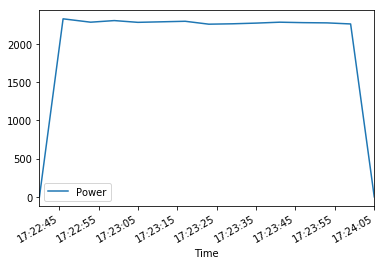

In [6]:
for i in range(1):
    start = activations['start'][i]
    end = activations['end'][i]
    print(start,end)
    kettle_signal[start:end].plot()
    plt.show()

In [14]:
#aggregate_power.resample('2min').mean().isnull()['Power'].value_counts()
aggregate_power_15m = aggregate_power.resample('15min').mean()
aggregate_power_15m = aggregate_power_15m.dropna()
print(aggregate_power.shape, aggregate_power_15m.shape)

(10239433, 1) (71323, 1)


In [15]:
clean_ap = clean_power_series(aggregate_power_15m, activations)

1.0%
2.0%
3.0%
4.0%
5.0%
6.0%
7.0%
8.0%
9.0%
10.0%
11.0%
12.0%
13.0%
14.0%
15.0%
16.0%
17.0%
18.0%
19.0%
20.0%
21.0%
22.0%
23.0%
24.0%
25.0%
26.0%
27.0%
28.0%
29.0%
30.0%
31.0%
32.0%
33.0%
34.0%
35.0%
36.0%
37.0%
38.0%
39.0%
40.0%
41.0%
42.0%
43.0%
44.0%
45.0%
46.0%
47.0%
48.0%
49.0%
50.0%
51.0%
52.0%
53.0%
54.0%
55.0%
56.0%
57.0%
58.0%
59.0%
60.0%
61.0%
62.0%
63.0%
64.0%
65.0%
66.0%
67.0%
68.0%
69.0%
70.0%
71.0%
72.0%
73.0%
74.0%
75.0%
76.0%
77.0%
78.0%
79.0%
80.0%
81.0%
82.0%
83.0%
84.0%
85.0%
86.0%
87.0%
88.0%
89.0%
90.0%
91.0%
92.0%
93.0%
94.0%
95.0%
96.0%
97.0%
98.0%
99.0%
100.0%
101.0%
102.0%


In [16]:
syntethic_data, syntethic_response = make_syntethic_data(aggregate_power_15m, activations, n=10000,
                                     ap_sans_activations = clean_ap, sample_length = 32)

0.0


/home/bjornif/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/bjornif/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0


In [20]:
#syntethic_data_pd = pd.DataFrame(syntethic_data)
syntethic_data.to_csv('../master_data/nilm/syntethic_data_15m.dat', sep=' ')
#syntethic_response_pd = pd.DataFrame(syntethic_response)
syntethic_response.to_csv('../master_data/nilm/syntethic_response_15m.dat', sep=' ')

In [18]:
syntethic_response.head()

,start,end,mean_power
0,0,0,0
1,0.225806,0.225806,NaN
2,0.225806,0.225806,NaN
3,0.322581,0.354839,365.62
4,0,0,0


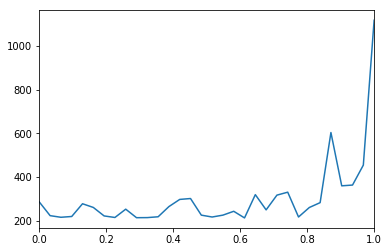

start         0
end           0
mean_power    0
Name: 0, dtype: object


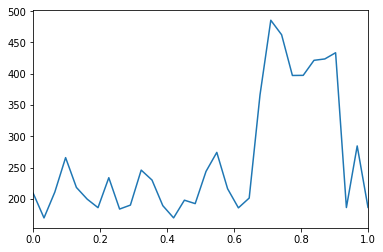

start         0.225806
end           0.225806
mean_power         NaN
Name: 1, dtype: object


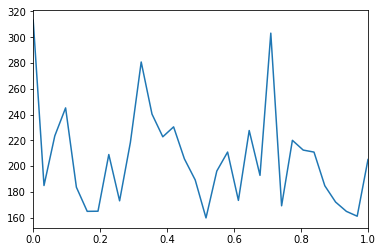

start         0.225806
end           0.225806
mean_power         NaN
Name: 2, dtype: object


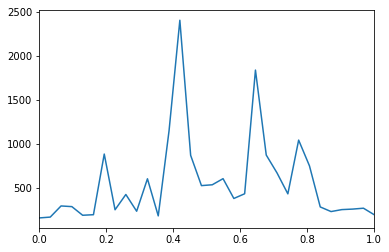

start         0.322581
end           0.354839
mean_power      365.62
Name: 3, dtype: object


,0.0,0.0322580645161,0.0645161290323,0.0967741935484,0.129032258065,0.161290322581,0.193548387097,0.225806451613,0.258064516129,0.290322580645,...,0.709677419355,0.741935483871,0.774193548387,0.806451612903,0.838709677419,0.870967741935,0.903225806452,0.935483870968,0.967741935484,1.0
0,286.554745,224.207143,216.837037,220.438849,278.576642,261.692857,222.942029,215.905797,253.800000,214.898551,...,317.915493,331.386861,218.137681,261.464286,283.657143,603.742647,360.438849,363.887324,454.954198,1116.384058
1,208.918919,169.531034,210.753425,265.924138,218.268966,199.524823,185.932432,233.823129,183.700680,190.027211,...,485.558621,462.410959,397.262069,397.448980,421.489655,423.675862,433.604167,186.131034,284.607143,186.344828
2,313.170068,184.931507,223.444444,245.160839,183.584507,164.892857,164.993151,208.971831,173.056338,218.445205,...,303.157534,169.198630,220.007042,212.428571,210.872340,184.748299,172.089041,164.863946,161.109589,205.104167
3,154.691781,164.094595,290.844595,283.312925,184.924658,191.272109,881.755396,247.655405,421.468966,230.858108,...,666.342466,428.618056,1040.510791,747.858156,279.662069,227.020548,249.305556,255.149660,265.212329,190.761905
4,680.556338,641.788732,369.609589,352.979452,431.951389,363.424658,355.783784,311.258503,491.151724,525.067568,...,187.952703,175.594595,173.993007,215.855172,179.175676,237.227586,215.783784,172.256757,171.721088,199.800000


In [19]:
for i in range(4):
    syntethic_data.iloc[i].plot()
    plt.show()
    print(syntethic_response.iloc[i])

syntethic_data.head()